In [13]:
!which python

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)


In [1]:
#Importar librerías necesarias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor, Pool
import matplotlib.pyplot as plt

In [2]:
# Ruta del dataset
ruta_dataset = "../../Limpieza/data/df_unificado_limpio_imputado.csv"
df = pd.read_csv(ruta_dataset)

In [3]:
# Mostrar la estructura del dataset
print("Estructura del dataset:")
print(df.info())

Estructura del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917885 entries, 0 to 917884
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   AÑO                           917885 non-null  int64  
 1   TRIMESTRE                     917885 non-null  float64
 2   PROVEEDOR                     917885 non-null  object 
 3   CÓDIGO DANE                   917885 non-null  float64
 4   DEPARTAMENTO                  917885 non-null  object 
 5   CÓDIGO DANE.1                 917885 non-null  float64
 6   MUNICIPIO                     917885 non-null  object 
 7   SEGMENTO                      917885 non-null  object 
 8   TECNOLOGÍA                    917885 non-null  object 
 9   VELOCIDAD BAJADA              917885 non-null  float64
 10  VELOCIDAD SUBIDA              917885 non-null  float64
 11  No. ACCESOS FIJOS A INTERNET  917885 non-null  int64  
 12  Latitud             

In [4]:
# Definir variables predictoras y variable objetivo
columnas_predictoras = ['AÑO', 'TRIMESTRE', 'VELOCIDAD BAJADA', 'VELOCIDAD SUBIDA', 'Latitud', 'Longitud']
X = df[columnas_predictoras]
y = df['No. ACCESOS FIJOS A INTERNET']

In [5]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Definir y entrenar el modelo CatBoost
modelo_cb = CatBoostRegressor(iterations=500, learning_rate=0.1, depth=6, random_state=42, verbose=0)
modelo_cb.fit(X_train, y_train)

In [7]:
# Realizar predicciones
y_pred = modelo_cb.predict(X_test)

In [8]:
# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [9]:
print(f"Error cuadrático medio (MSE): {mse}")
print(f"Coeficiente de determinación (R²): {r2}")

Error cuadrático medio (MSE): 303333.8729210619
Coeficiente de determinación (R²): 0.2187904290252234


In [10]:
# Importancia de las variables
importancia = modelo_cb.feature_importances_
variables = columnas_predictoras

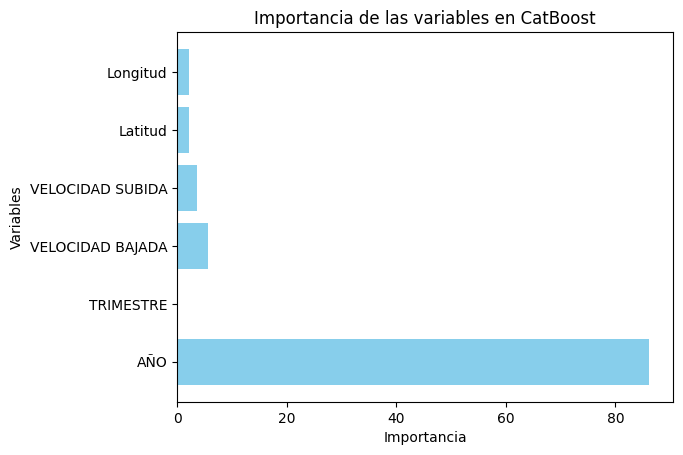

In [11]:
plt.barh(variables, importancia, color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables en CatBoost')
plt.show()

### Conclusiones del Modelo **CatBoost**

---

#### **Desempeño del Modelo**
- **Error Cuadrático Medio (MSE):** `303,333.87`
  - Aunque el MSE sigue siendo alto, se observa que está en el mismo rango que otros modelos probados anteriormente, como Random Forest y Gradient Boosting.
- **Coeficiente de Determinación (R²):** `0.2188`
  - El modelo **CatBoost** es capaz de explicar aproximadamente el **21.88%** de la variabilidad de los datos.
  - A pesar de la mejora en la técnica utilizada, el bajo valor de R² indica que el modelo sigue teniendo dificultades para capturar patrones complejos.

---

#### **Importancia de las Variables**
- La variable **AÑO** sigue siendo **la más relevante**, con una importancia significativamente mayor al resto.
- Las variables **VELOCIDAD BAJADA**, **VELOCIDAD SUBIDA**, **Latitud** y **Longitud** presentan una **contribución mínima**.
- **TRIMESTRE** prácticamente no tiene relevancia en el modelo.

---

#### **Comparación con Otros Modelos**
| Modelo                    | MSE          | R²          |
|---------------------------|--------------|-------------|
| CatBoost                 | 303,333.87   | 0.2188      |
| LightGBM                 | 303,885.37   | 0.2173      |
| Gradient Boosting (GBM)   | 303,288.97   | 0.2189      |
| XGBoost                  | 303,949.16   | 0.2172      |
| Random Forest            | 215,128.71   | 0.22        |

- CatBoost y GBM tienen un desempeño muy similar en términos de MSE y R².
- Ningún modelo logra capturar adecuadamente la variabilidad de los datos.

---

#### **Posibles Problemas**
1. **Dependencia Temporal:** El predominio de la variable **AÑO** indica que los accesos fijos a internet tienen una dependencia temporal muy fuerte, lo que podría limitar el poder predictivo.
2. **Poca Variabilidad en Datos:** Las variables **VELOCIDAD BAJADA** y **VELOCIDAD SUBIDA** muestran muy baja relevancia, posiblemente por falta de variabilidad en los datos.
3. **Sub-representación de otras variables:** Las variables geográficas (Latitud y Longitud) y trimestrales parecen aportar muy poco valor al modelo.

---